# Basic image enhancement using mathematical operations
- Arithmetic operations like addition, multiplication
- Thresholding and masking
- Bitwise operations like OR, NOR..

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image

# Read image

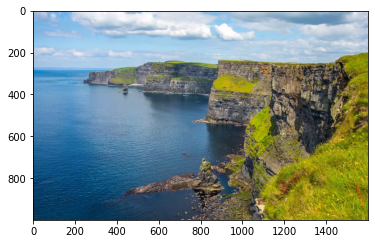

In [53]:
img1 = cv2.imread("1.png", cv2.IMREAD_COLOR)
img1 = img1[:, :, ::-1]

plt.imshow(img1)

# Addition or brightness

Text(0.5, 1.0, 'Origin')

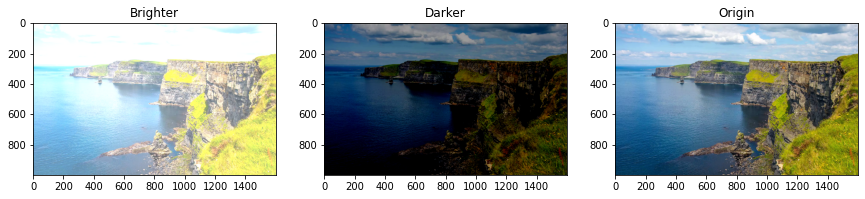

In [54]:
matrix = np.ones(img1.shape, dtype="uint8")*100

img1_brighter = cv2.add(img1, matrix)
img1_darker = cv2.subtract(img1, matrix)

#plot
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img1_brighter); plt.title("Brighter")
plt.subplot(142); plt.imshow(img1_darker); plt.title("Darker")
plt.subplot(143); plt.imshow(img1); plt.title("Origin")

# Multiplication or Contrast

Text(0.5, 1.0, 'Origin')

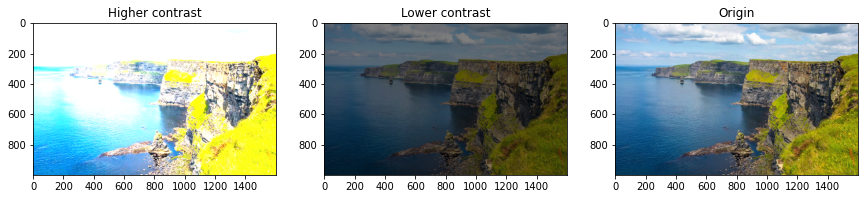

In [55]:
matrix1 = np.ones(img1.shape) * 0.5
matrix2 = np.ones(img1.shape) * 2.5

img1_higher2 = np.uint8(cv2.multiply(np.float64(img1), matrix2))
img1_lower2 = np.uint8(cv2.multiply(np.float64(img1), matrix1))

#plot
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img1_higher2); plt.title("Higher contrast")
plt.subplot(142); plt.imshow(img1_lower2); plt.title("Lower contrast")
plt.subplot(143); plt.imshow(img1); plt.title("Origin")

# Handling overflow using clip

Text(0.5, 1.0, 'Origin')

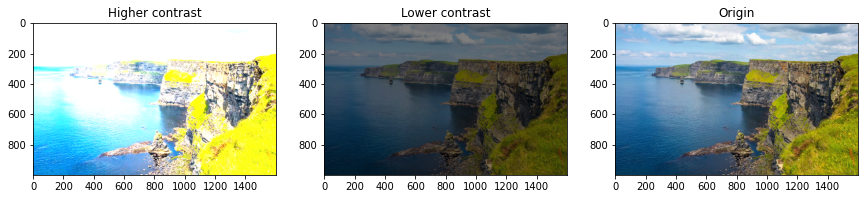

In [56]:
matrix1 = np.ones(img1.shape) * 0.5
matrix2 = np.ones(img1.shape) * 2.5

img1_higher2 = np.uint8(np.clip(cv2.multiply(np.float64(img1), matrix2), 0, 255))
img1_lower2 = np.uint8(cv2.multiply(np.float64(img1), matrix1))

#plot
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img1_higher2); plt.title("Higher contrast")
plt.subplot(142); plt.imshow(img1_lower2); plt.title("Lower contrast")
plt.subplot(143); plt.imshow(img1); plt.title("Origin")

# Image Thresholding
This can be used to implement OCR

Text(0.5, 1.0, 'Threshold: adaptive')

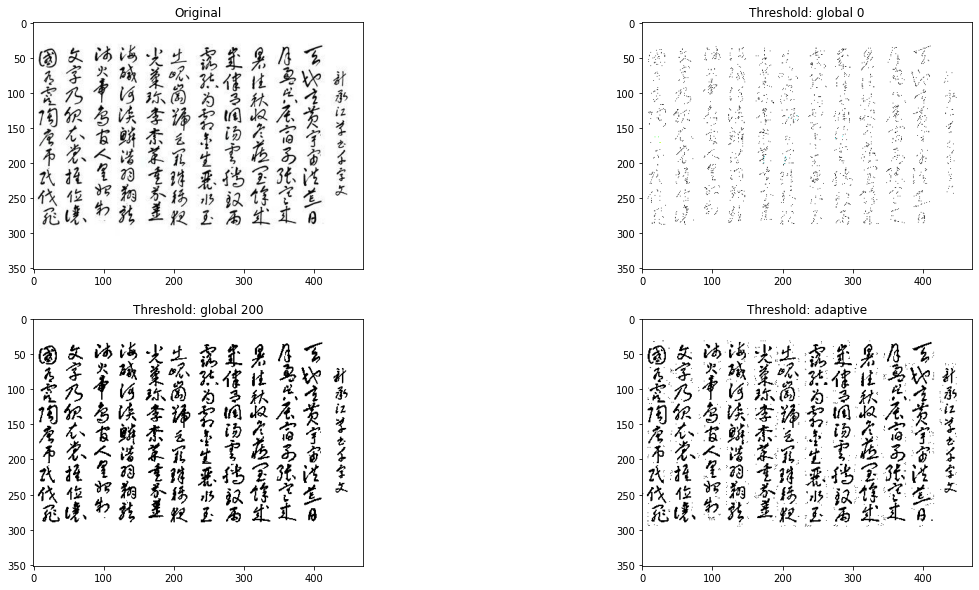

In [57]:
img2 = cv2.imread("2.png", cv2.IMREAD_COLOR)

#perform global thresholding
retval, img2_glb_thresh1 = cv2.threshold(img2, 0,255, cv2.THRESH_BINARY)
retval, img2_glb_thresh2 = cv2.threshold(img2, 200, 255, cv2.THRESH_BINARY)

#perform adaptive thresholding, note: for adaptive, we need to convert img to gray scale
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_thresh_adp = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

#plot
plt.figure(figsize=[20,10])
plt.subplot(221); plt.imshow(img2, cmap='gray'); plt.title("Original")
plt.subplot(222); plt.imshow(img2_glb_thresh1, cmap='gray'); plt.title("Threshold: global 0")
plt.subplot(223); plt.imshow(img2_glb_thresh2, cmap='gray'); plt.title("Threshold: global 200")
plt.subplot(224); plt.imshow(img2_thresh_adp, cmap='gray'); plt.title("Threshold: adaptive")

# Bitwise operation

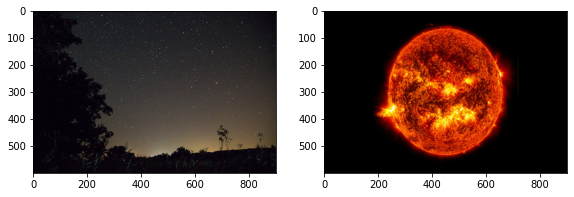

In [58]:
#read image
img3 = cv2.imread("3.png", cv2.IMREAD_COLOR)
img4 = cv2.imread("4.png", cv2.IMREAD_COLOR)

img3 = cv2.resize(img3, dsize=[900,600])
img4 = cv2.resize(img4, dsize=[900,600])

img3 = img3[:, :, ::-1]
img4 = img4[:, :, ::-1]

#plot
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img3)
plt.subplot(142); plt.imshow(img4)

## bitwise AND operator

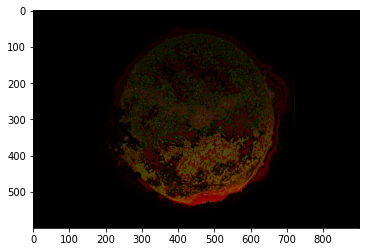

In [59]:
and_result = cv2.bitwise_and(img3, img4, mask=None)
plt.imshow(and_result, cmap='gray')

## Bitwise OR operator

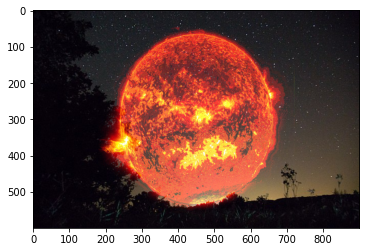

In [60]:
or_result = cv2.bitwise_or(img3, img4, mask=None)
plt.imshow(or_result, cmap='gray')

## Bitwise XOR operator

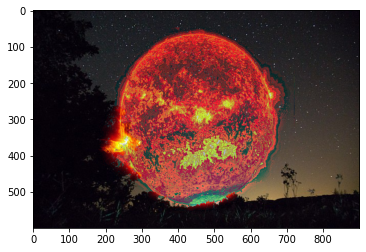

In [61]:
xor_result =cv2.bitwise_xor(img3, img4, mask=None)
plt.imshow(xor_result, cmap='gray')

# Application: logo manipulation

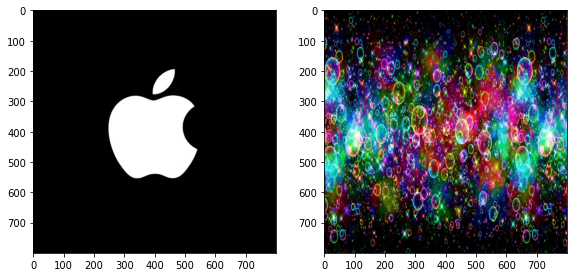

In [62]:
img5 = cv2.imread("5.png")
img6 = cv2.imread("6.png")

img5 = img5[:, :, ::-1]
img6 = img6[:, :, ::-1]

img5 = cv2.resize(img5, dsize=[800,800])
img6 = cv2.resize(img6, dsize=[800,800])

#plot
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img5)
plt.subplot(142); plt.imshow(img6)

## Create mask for apple logo

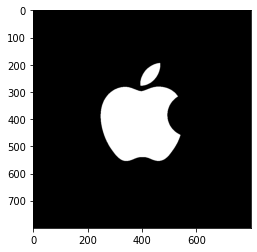

In [63]:
img5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)
retval, img5_mask = cv2.threshold(img5, 100, 255, cv2.THRESH_BINARY)

plt.imshow(img5_mask, cmap='gray')

## Invert the mask

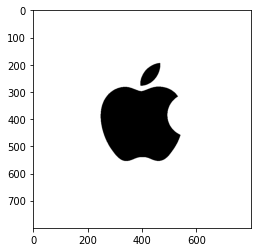

In [64]:
img5_mask_inv = cv2.bitwise_not(img5_mask)
plt.imshow(img5_mask_inv, cmap='gray')

## Apply background on the mask

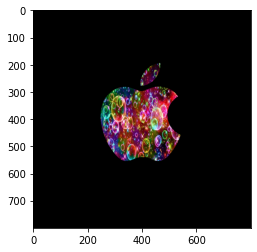

In [65]:
img5_bg = cv2.bitwise_and(img6, img6, mask=img5_mask)
plt.imshow(img5_bg)